# $t\bar{t}$ HEP tutorial

https://ippog-test.web.cern.ch/resources/2012/cms-hep-tutorial

Original authors:
christian.sander@cern.ch,
alexander.schmidt@cern.ch

This notebook adaptation:
thomas.mccauley@cern.ch

<img src="graphics/semileptonic_ttbar.png" width=60%></img>

## Getting started

In [1]:
# Stuff for running in Colab: but still need to sort out data handling
import sys, subprocess

colab_requirements = [
  'pip install uproot4==0.0.15',
  'pip install awkward1==0.2.25',
]

def install_requirements(cmd):
  process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
  for line in process.stdout:
    print(line.decode().strip())

if 'google.colab' in sys.modules.keys():
  for r in colab_requirements:
    install_requirements(r)

[Awkward array docs](https://awkward-array.readthedocs.io/en/latest/index.html)

In [2]:
import uproot4
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt

| Sample | Number of events | Comments |
| :--- | :--- | :--- |
| Data | 469384 | triggered on isolated Muons with pT > 24 GeV |
| MC: TTbar | 36941 | generated with MadGraph; isoMuon24 trigger bit stored |
| MC: W+jets | 	109737 | generated with MadGraph; triggered on simulated isolated Muons with pT > 24 GeV |
| MC: Drell Yan | 77729 | generated with MadGraph; triggered on simulated isolated Muons with pT > 24 GeV |
| MC: WW | 4580 |	generated with Pythia; triggered on simulated isolated Muons with pT > 24 GeV |
| MC: WZ | 3367 |	generated with Pythia; triggered on simulated isolated Muons with pT > 24 GeV |
| MC: ZZ | 2421 |	generated with Pythia; triggered on simulated isolated Muons with pT > 24 GeV |
| MC: single top | 5684 |	generated with Powheg; triggered on simulated isolated Muons with pT > 24 GeV |
| MC: QCD | 142 | 	generated with Pythia; triggered on simulated isolated Muons with pT > 24 GeV | 

* `NJet` (integer): number of jets in the event.

* `Jet_Px[NJet]` (float): x-component of jet momentum. This is an array of size NJet, where a
maximum of twenty jets are stored (NJet < 21). If there are more than twenty jets in the event,
only the twenty most energetic are stored. Only jets with p T > 30 GeV are stored.

* `Jet_Py[NJet]` (float): y-component of jet momentum, otherwise same as Jet_Px[NJet].

* `Jet_Pz[NJet]` (float): z-component of jet momentum, otherwise same as Jet_Px[NJet].

* `Jet_E[NJet]` (float): energy of the jet, otherwise same as Jet_Px[NJet]. Note that the four
compoments Jet_Px, Jet_Py, Jet_Pz and Jet_E constitute a fourvector which fully describes
the kinematics of a jet.

* `Jet_btag[NJet]` (float): b-tagging discriminator. This quantity is obtained from an algorithm
that identifies B-hadron decays within a jet. It is correlated with the lifetime of the B-hadron.
Higher values indicate a higher probability that the jet originates from a b-quark. Important:
The discriminator has small performance differences in data and simulation. To account for this,
simulated events have to be reweighted by a factor of ∼ 0.9 per required b-tagged quark.

* `Jet_ID[NJet]` (bool): Jet quality identifier to distiguish between real jets (induced by hadronic
interactions) and detector noise. A good jet has true as value.

* `NMuon` (integer): number of muons in the event.

* `Muon_Px[NMuon]` (float): x-component of muon momentum. This is an array of size NMuon,
where a maximum of five muons are stored (NMuon < 5). If there are more than five muons in
the event, only the five most energetic are stored.

* `Muon_Py[NMuon]` (float): y-component of muon momentum, otherwise same as Muon_Px[NMuon].

* `Muon_Pz[NMuon]` (float): z-component of muon momentum, otherwise same as Muon_Px[NMuon].

* `Muon_E[NMuon]` (float): energy of the muon, otherwise same as Muon_Px[NMuon]. Note that the
four compoments Muon_Px, Muon_Py, Muon_Pz and Muon_E constitute a fourvector which fully
describes the kinematics of a muon.

* `Muon_Charge[NMuon]` (integer): charge of the muon. It is determined from the curvature in the
magnetic field and has values +1 or -1.

* `Muon_Iso[NMuon]` (float): muon isolation. This variable is a measure for the amount of detector
activity around that muon. Muons within jets are accompanied by close-by tracks and deposits
in the calorimeters, leading to a large values of Muon_Iso. On the other hand, muons from W
bosons are isolated and have small values of Muon_Iso.

* `NElectron` (integer): same as for muons above, but for electrons.

* `Electron_Px[NElectron]` (float): same as for muons above, but for electrons.

* `Electron_Py[NElectron]` (float): same as for muons above, but for electrons.

* `Electron_Pz[NElectron]` (float): same as for muons above, but for electrons.

* `Electron_E[NElectron]` (float): same as for muons above, but for electrons.

* `Electron_Charge[NElectron]` (integer): same as for muons above, but for electrons.

* `Electron_Iso[NElectron]` (float): same as for muons above, but for electrons.

* `NPhoton` (integer): same as for muons above, but for photons.

* `Phtoton_Px[NPhoton]` (float): same as for muons above, but for photons.

* `Photon_Py[NPhoton]` (float): same as for muons above, but for photons.

* `Photon_Pz[NPhoton]` (float): same as for muons above, but for photons.

* `Photon_E[NPhoton]` (float): same as for muons above, but for photons.

* `Photon_Iso[NPhoton]` (float): same as for muons above, but for photons.

* `MET_px` (float): x-component of the missing energy. Due to the hermetic coverage of the LHC
detectors and the negligible transverse boost of the initial state, the transverse momentum
sum of all detector objects (jets, muons, etc...) must be zero. This is required by energy and
momentum conservation. Objects which escape the detector, such as neutrinos, are causing a
”missing” transverse energy which can be measured and associated to the neutrino.

* `MET_py` (float): y-component of the missing energy.

* `NPrimaryVertices` (integer): the number of proton-proton interaction vertices. Due to the high
LHC luminosity several protons within one bunch crossing can collide. This is usually referred
to as ”pileup”. The spread of these vertices is several centimeters in longitudinal direction and
only micrometers in the transverse direction.

* `triggerIsoMu24` (bool): the trigger bit. It is ”true” if the event is triggered and ”false” if the
event is not triggered (data can only contain triggered events).

* `MChadronicBottom_px` (float): x-compoment of the b-quark from the top decay belonging to
the hadronic branch.

* `MChadronicBottom_py` (float): y-compoment ...

* `MChadronicBottom_pz` (float): z-compoment ...

* `MChadronicWDecayQuark_px` (float): x-component of the quark from the hadronic W boson
decay

* `MChadronicWDecayQuark_py` (float): y-component ...

* `MChadronicWDecayQuark_pz` (float): z-component ...

* `MChadronicWDecayQuarkBar_px` (float): x-component of the anti-quark from the hadronic W
boson decay

* `MChadronicWDecayQuarkBar_py` (float): y-component ...

* `MChadronicWDecayQuarkBar_pz` (float): z-component ...

* `MCleptonicBottom_px` (float): x-compoment of the b-quark from the top decay belonging to
the leptonic branch.

* `MCleptonicBottom_py` (float): y-compoment ...

* `MCleptonicBottom_pz` (float): z-compoment ...

* `MClepton_px` (float): x-component of the lepton (electron, muon, tau) from the leptonic W
boson decay.

* `MClepton_py` (float): y-component ...

* `MClepton_pz` (float): z-component ...

* `MCleptonPDGid` (integer): particle “ID” of the lepton. Possible values are 11 for electrons, 13
for muons, 15 for taus. Negative numbers indicate anti-particles.

* `MCneutrino_px` (float): x-component of the neutrino from the leptonic W boson decay.

* `MCneutrino_py` (float): y-component ...

* `MCneutrino_pz` (float): z-component ...

* `EventWeight` (float): weight factor to be applied to simulated events due to different sample
sizes.

In [3]:
data = uproot4.open('./data/data.root:events')
ttbar = uproot4.open('./data/ttbar.root:events')
wjets = uproot4.open('./data/wjets.root:events')
dy = uproot4.open('./data/dy.root:events')
ww = uproot4.open('./data/ww.root:events')
zz = uproot4.open('./data/zz.root:events')
single_top = uproot4.open('./data/single_top.root:events')
qcd = uproot4.open('data/qcd.root:events')

In [4]:
data.show()

name                 | typename             | interpretation                    
---------------------+----------------------+-----------------------------------
NJet                 | int32_t              | AsDtype('>i4')                    
Jet_Px               | float[]              | AsJagged(AsDtype('>f4'))          
Jet_Py               | float[]              | AsJagged(AsDtype('>f4'))          
Jet_Pz               | float[]              | AsJagged(AsDtype('>f4'))          
Jet_E                | float[]              | AsJagged(AsDtype('>f4'))          
Jet_btag             | float[]              | AsJagged(AsDtype('>f4'))          
Jet_ID               | bool[]               | AsJagged(AsDtype('bool'))         
NMuon                | int32_t              | AsDtype('>i4')                    
Muon_Px              | float[]              | AsJagged(AsDtype('>f4'))          
Muon_Py              | float[]              | AsJagged(AsDtype('>f4'))          
Muon_Pz              | float

## 1. Warmup

The trigger for this tutorial selects events which contain one or more muons as discussed in the
documentation and explanation.

* Find out how often there is more than one isolated, reconstructed muon in data (histogram of the muon multiplicity). Where could these additional muons come from?

In [5]:
data_events = data.arrays(library="ak", how="zip")
ak.type(data_events)

469384 * {"NJet": int32, "NMuon": int32, "NElectron": int32, "NPhoton": int32, "MET_px": float32, "MET_py": float32, "MChadronicBottom_px": float32, "MChadronicBottom_py": float32, "MChadronicBottom_pz": float32, "MCleptonicBottom_px": float32, "MCleptonicBottom_py": float32, "MCleptonicBottom_pz": float32, "MChadronicWDecayQuark_px": float32, "MChadronicWDecayQuark_py": float32, "MChadronicWDecayQuark_pz": float32, "MChadronicWDecayQuarkBar_px": float32, "MChadronicWDecayQuarkBar_py": float32, "MChadronicWDecayQuarkBar_pz": float32, "MClepton_px": float32, "MClepton_py": float32, "MClepton_pz": float32, "MCleptonPDGid": int32, "MCneutrino_px": float32, "MCneutrino_py": float32, "MCneutrino_pz": float32, "NPrimaryVertices": int32, "triggerIsoMu24": bool, "EventWeight": float32, "Jet": var * {"Px": float32, "Py": float32, "Pz": float32, "E": float32, "btag": float32, "ID": bool}, "Muon": var * {"Px": float32, "Py": float32, "Pz": float32, "E": float32, "Charge": int32, "Iso": float32}, 

In [6]:
# Add pt and eta to data for muons
data_events['Muon', 'Pt'] = np.sqrt(
    data_events.Muon.Px*data_events.Muon.Px +
    data_events.Muon.Py*data_events.Muon.Py
)

data_events['Muon', 'Eta'] = np.arcsinh(
    data_events.Muon.Pz / data_events.Muon.Pt
)

Text(0.5, 0, '# muons')

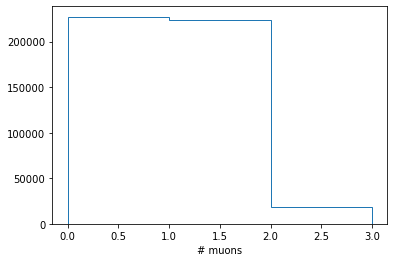

In [7]:
n,b,_ = plt.hist(data_events.NMuon, histtype='step', bins=3, range=(0,3))
plt.xlabel('# muons')

Text(0.5, 0, '# isolated muons')

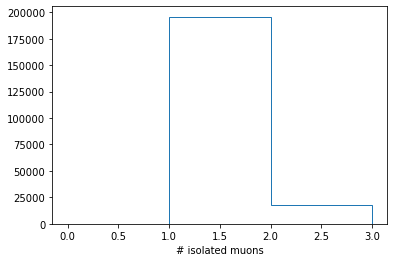

In [8]:
iso_muons = data_events[
    ak.any((data_events.Muon.Iso / data_events.Muon.Pt < 0.10) & (data_events.Muon.Pt > 25), axis=1)
]

n,b,_ = plt.hist(iso_muons.NMuon, histtype='step', bins=3, range=(0,3))
plt.xlabel('# isolated muons')

* Calculate the invariant mass of two muons of opposite charge. Only use isolated muons.

* Display the invariant mass distribution of two muons in a histogram (hint: try different axis ranges).

(60.0, 120.0)

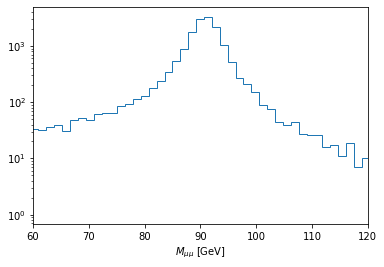

In [9]:
# There are 2 muons and both have pt > 20 GeV
two_iso_muons = iso_muons[(iso_muons.NMuon == 2) & (ak.all(iso_muons.Muon.Pt > 20, axis=1))]

two_iso_muons['M'] = [
        np.sqrt(
                (m.E[0]+m.E[1])**2 - 
                (m.Px[0]+m.Px[1])**2 - 
                (m.Py[0]+m.Py[1])**2 -
                (m.Pz[0]+m.Pz[1])**2
        ) for m in two_iso_muons.Muon
]
    
    
n,b,_ = plt.hist(two_iso_muons.M, bins=500, log=True, histtype='step')
plt.xlabel('$M_{\mu\mu}$ [GeV]')
plt.xlim([60, 120])

* Compare your results to MC simulation (display simulation and data in the same histogram). Make sure you select triggered events only for the simulated samples.

In [10]:
# Put mc in a dict and select only triggered events

mc = {
    'tt': ttbar.arrays(library='ak', how='zip'),
    'wjets': wjets.arrays(library='ak', how='zip'),
    'dy': dy.arrays(library='ak', how='zip'),
    'ww': ww.arrays(library='ak', how='zip'),
    'zz': zz.arrays(library='ak', how='zip'),
    'single_top': single_top.arrays(library='ak', how='zip'),
    'qcd': qcd.arrays(library='ak', how='zip'),
}

for n in mc:
    mc[n] = mc[n][mc[n].triggerIsoMu24]



In [11]:
# Add pt, phi, eta, and MET to MC for jets, muons, electrons
for n in mc:
    
    mc[n]['Muon', 'Pt'] = np.sqrt(
        mc[n].Muon.Px**2 + mc[n].Muon.Py**2
    )
    
    mc[n]['Muon', 'Phi'] = np.arctan2(
        mc[n].Muon.Py, mc[n].Muon.Px
    ) 
    
    mc[n]['Muon', 'Eta'] = np.arcsinh(
        mc[n].Muon.Pz / mc[n].Muon.Pt
    )
    
    mc[n]['Electron', 'Pt'] = np.sqrt(
        mc[n].Electron.Px**2 + mc[n].Electron.Py**2
    )
    
    mc[n]['Electron', 'Phi'] = np.arctan2(
        mc[n].Electron.Py, mc[n].Electron.Px
    ) 
    
    mc[n]['Electron', 'Eta'] = np.arcsinh(
        mc[n].Electron.Pz / mc[n].Electron.Pt
    )
    
    mc[n]['Jet', 'Pt'] = np.sqrt(
        mc[n].Jet.Px**2 + mc[n].Jet.Py**2
    )
    
    mc[n]['Jet', 'Phi'] = np.arctan2(
        mc[n].Jet.Py, mc[n].Jet.Px
    )
    
    mc[n]['Jet', 'Eta'] = np.arcsinh(
        mc[n].Jet.Pz / mc[n].Jet.Pt
    )
    
    mc[n]['MET'] = np.sqrt(
        mc[n].MET_px**2 + mc[n].MET_py**2 
    )

In [12]:
ak.type(mc['tt'])

4515 * {"NJet": int32, "NMuon": int32, "NElectron": int32, "NPhoton": int32, "MET_px": float32, "MET_py": float32, "MChadronicBottom_px": float32, "MChadronicBottom_py": float32, "MChadronicBottom_pz": float32, "MCleptonicBottom_px": float32, "MCleptonicBottom_py": float32, "MCleptonicBottom_pz": float32, "MChadronicWDecayQuark_px": float32, "MChadronicWDecayQuark_py": float32, "MChadronicWDecayQuark_pz": float32, "MChadronicWDecayQuarkBar_px": float32, "MChadronicWDecayQuarkBar_py": float32, "MChadronicWDecayQuarkBar_pz": float32, "MClepton_px": float32, "MClepton_py": float32, "MClepton_pz": float32, "MCleptonPDGid": int32, "MCneutrino_px": float32, "MCneutrino_py": float32, "MCneutrino_pz": float32, "NPrimaryVertices": int32, "triggerIsoMu24": bool, "EventWeight": float32, "Photon": var * {"Px": float32, "Py": float32, "Pz": float32, "E": float32, "Iso": float32}, "Muon": var * {"Px": float32, "Py": float32, "Pz": float32, "E": float32, "Charge": int32, "Iso": float32, "Pt": float32

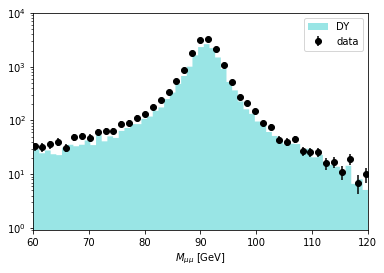

In [13]:
n,b = np.histogram(ak.to_numpy(two_iso_muons.M), bins=500)
center = (b[:-1] + b[1:]) / 2
yerrs = np.sqrt(n)

plt.errorbar(center, n, yerr=yerrs, linestyle='None', color='black', marker='o')
plt.xlabel('$M_{\mu\mu}$ [GeV]')
plt.xlim([60, 120])
plt.ylim([0.9, 1e4])
plt.yscale('log')

# Asymmetric error bars for log y?

dy_iso = mc['dy'][
    (mc['dy'].NMuon == 2) & (ak.all(mc['dy'].Muon.Pt > 20, axis=1))
]

dy_M = [
    np.sqrt(
        (m.E[0]+m.E[1])**2 - 
        (m.Px[0]+m.Px[1])**2 - 
        (m.Py[0]+m.Py[1])**2 -
        (m.Pz[0]+m.Pz[1])**2
    ) for m in dy_iso.Muon
]

plt.hist(dy_M, bins=500, log=True, histtype='stepfilled', weights=dy_iso.EventWeight, color='c', alpha=0.4)

plt.xlabel('$M_{\mu\mu}$ [GeV]')
plt.xlim([60, 120])
plt.legend(['DY', 'data'])

## 2. Properties of top quark events
In this exercise we take the first steps towards a real measurement using top quark events. We need
to understand how we can efficiently select top quark events and reject events without top quarks
(background rejection) at the same time.

*  Starting from the requirement of at least one isolated muon, compare several other distributions of event variables for simulated signal ($t\bar{t}$ events) and background.

In [14]:
# Select for at least one isolated muon
for n in mc:
    mc[n] = mc[n][ak.any((mc[n].Muon.Iso / mc[n].Muon.Pt < 0.10), axis=1)]
    mc[n] = mc[n][mc[n].NMuon >= 1]

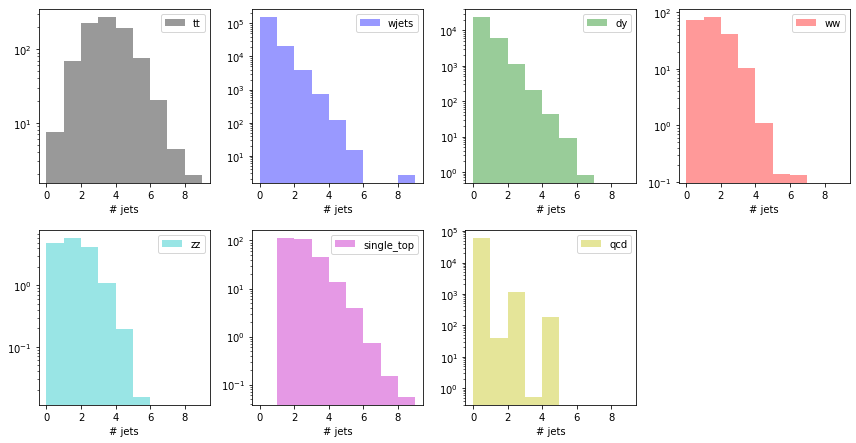

In [15]:
colors = ['k', 'b', 'g', 'r', 'c', 'm', 'y']

fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        mc[n].NJet, 
        histtype='stepfilled',
        weights=mc[n].EventWeight, 
        log=True,
        bins=9,
        range=(0,9),
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('# jets')
    plt.legend([n])

plt.tight_layout()

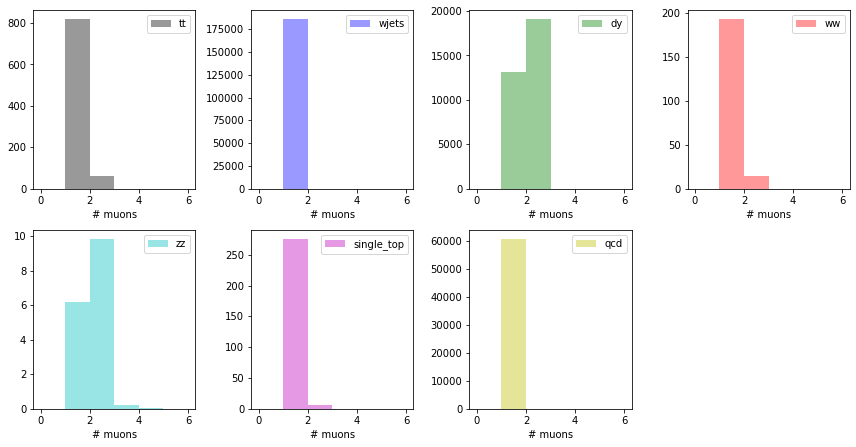

In [16]:
fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        mc[n].NMuon, 
        histtype='stepfilled',
        weights=mc[n].EventWeight, 
        log=False,
        bins=6,
        range=(0,6),
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('# muons')
    plt.legend([n])

plt.tight_layout()

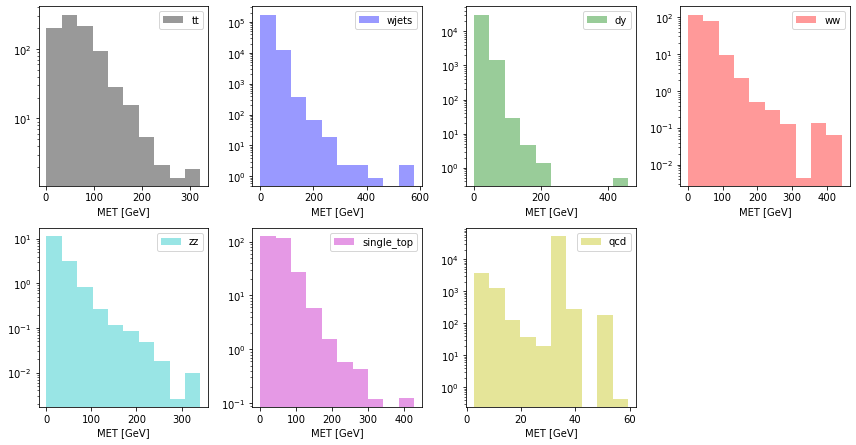

In [17]:
fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        mc[n].MET, 
        histtype='stepfilled',
        weights=mc[n].EventWeight, 
        log=True,
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('MET [GeV]')
    plt.legend([n])

plt.tight_layout()

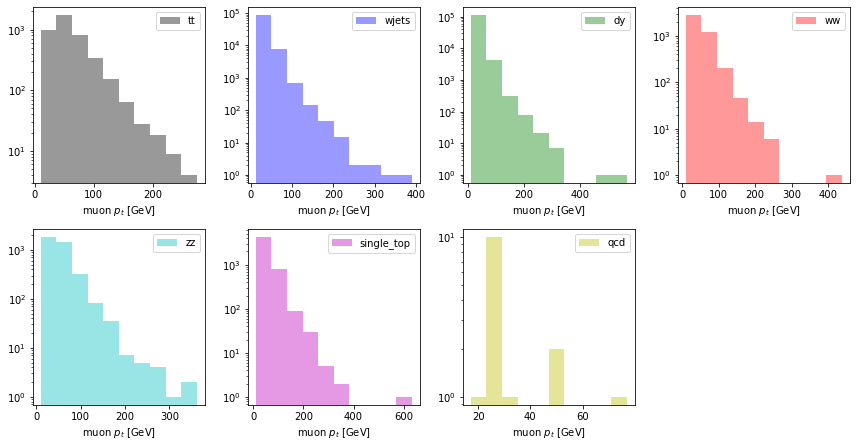

In [18]:
fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        ak.flatten(mc[n].Muon.Pt), 
        histtype='stepfilled',
        log=True,
        #bins=60,
        #range=(0,600),
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('muon $p_{t}$ [GeV]')
    plt.legend([n])

plt.tight_layout()

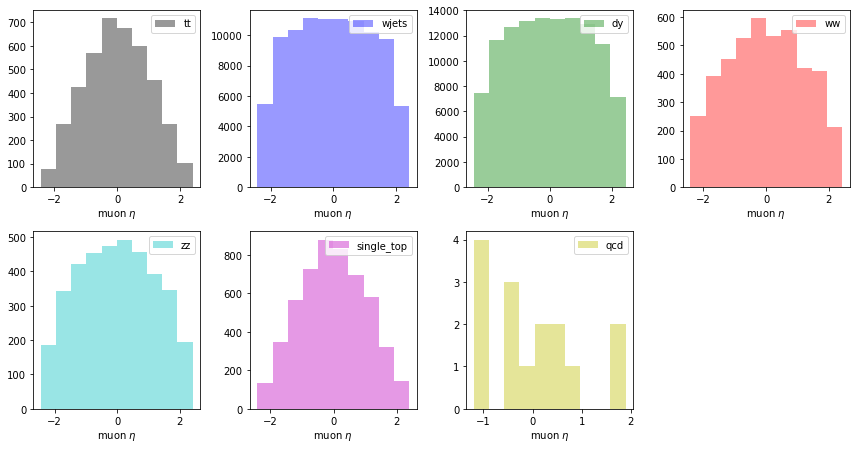

In [19]:
fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        ak.flatten(mc[n].Muon.Eta), 
        histtype='stepfilled',
        log=False,
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('muon $\eta$')
    plt.legend([n])

plt.tight_layout()

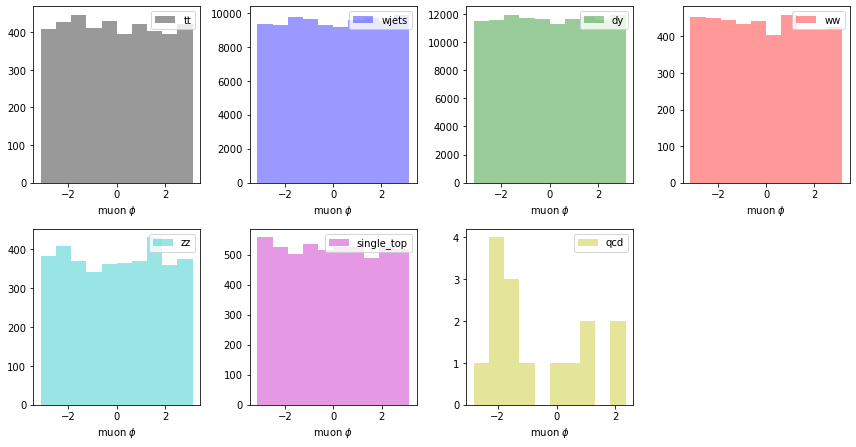

In [20]:
fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        ak.flatten(mc[n].Muon.Phi), 
        histtype='stepfilled',
        log=False,
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('muon $\phi$')
    plt.legend([n])

plt.tight_layout()

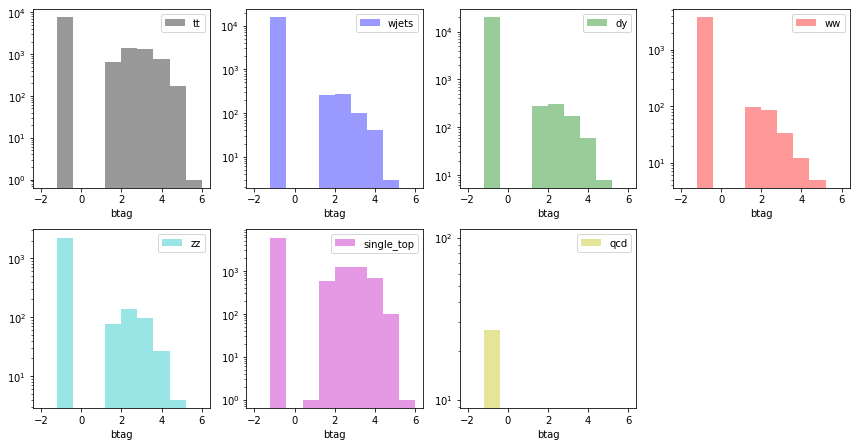

In [21]:
fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        ak.flatten(mc[n].Jet.btag), 
        histtype='stepfilled',
        log=True,
        range=(-2,6),
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('btag')
    plt.legend([n])

plt.tight_layout()

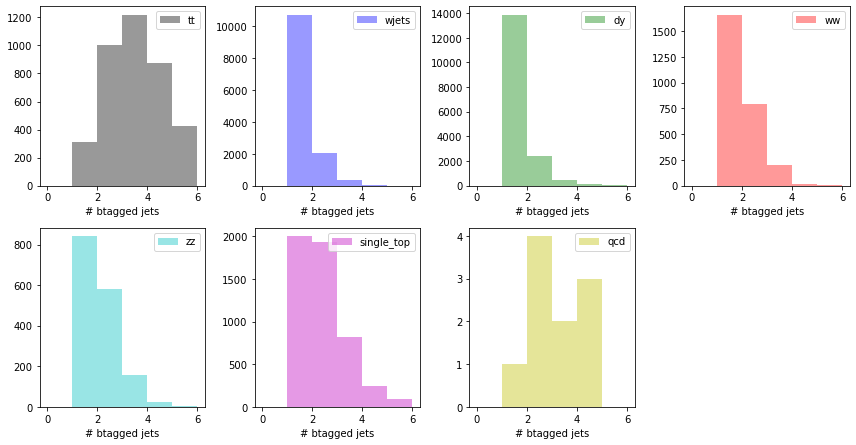

In [22]:
fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        mc[n][ak.any(mc[n].Jet.btag, axis=1)].NJet, 
        histtype='stepfilled',
        log=False,
        bins=6,
        range=(0,6),
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('# btagged jets')
    plt.legend([n])

plt.tight_layout()

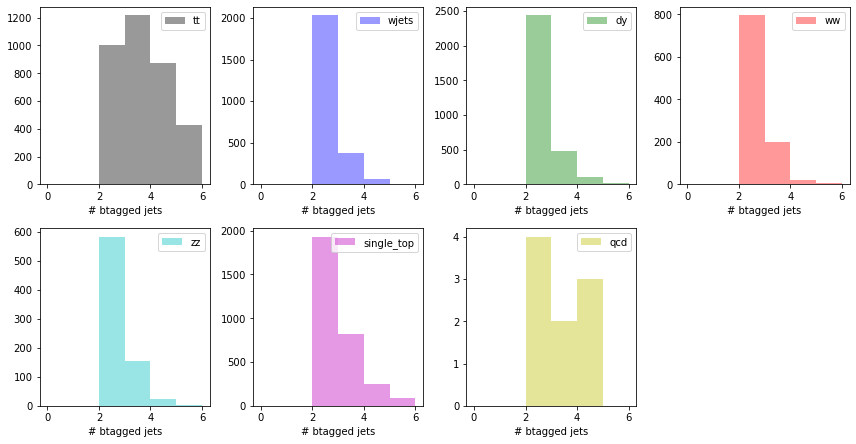

In [23]:
fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        mc[n][ak.num(mc[n].Jet.btag, axis=1) >= 2].NJet, 
        histtype='stepfilled',
        log=False,
        bins=6,
        range=(0,6),
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('# btagged jets')
    plt.legend([n])

plt.tight_layout()

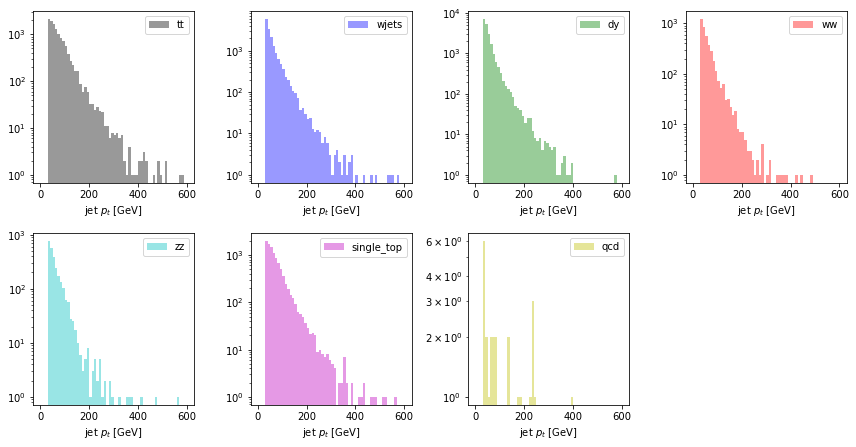

In [24]:
fig = plt.figure(figsize=(12, 12))

for i,n in enumerate(mc):
    
    ax = plt.subplot(4,4,i+1)
    
    plt.hist(
        ak.flatten(mc[n].Jet.Pt), 
        histtype='stepfilled',
        log=True,
        bins=60,
        range=(0,600),
        color=colors[i],
        alpha=0.4,
    ) 

    plt.xlabel('jet $p_{t}$ [GeV]')
    plt.legend([n])

plt.tight_layout()

*  Try to find variables which are especially sensitive to separate signal from background (jet multiplicity, transverse momenta of jets and leptons, lepton isolation, b-tagging, missing transverse energy, angular distributions). Fill all these distributions into histograms and compare between signal, background and data.

* Apply cuts on these variables to enrich the signal over background. Try to optimize the signal over background ratio and estimate the purity that can be achieved (based on simulation only).

In [25]:
'''
* Reject events with > 1 isolated muon
* Reject events with fewer than 4 jets
* Reject events with MET < 30 GeV
'''

nJets = 4
nMuons = 1
minMET = 30

selected_mc = mc.copy()

for n in selected_mc:
    
    selected_mc[n] = selected_mc[n][
        (selected_mc[n].NJet >= nJets) & 
        (selected_mc[n].NMuon == nMuons) &
        (selected_mc[n].MET > minMET) &
        (ak.num(selected_mc[n].Jet.btag, axis=1) >= 2)
    ]
        
n_events = 0
        
for n in selected_mc:
    
    ne = weights = np.sum(selected_mc[n].EventWeight)
    n_events += ne
    print(f'{n}:{ne}')
    
print(f'total:{n_events}')

tt:232.409423828125
wjets:109.03071594238281
dy:6.09768009185791
ww:1.0299400091171265
zz:0.007081070449203253
single_top:14.541021347045898
qcd:180.58062744140625
total:543.6964897303842


In [26]:
selected_data = data_events[ak.any((data_events.Muon.Iso / data_events.Muon.Pt < 0.10), axis=1)]

selected_data['MET'] = np.sqrt(
        selected_data.MET_px**2 + selected_data.MET_py**2 
    )

selected_data = selected_data[
    (selected_data.NJet >= nJets) & 
    (selected_data.NMuon == nMuons) & 
    (selected_data.MET > minMET) &
    (ak.num(selected_data.Jet.btag, axis=1) >= 2)
]

In [27]:
print(len(selected_data))

397


*  Apply cuts on these variables to enrich the signal over background. Try to optimize the signal over background ratio and estimate the purity that can be achieved (based on simulation only).

*  Apply your selection cuts also on data. Compare the selection efficiency between data and simulation.

### 3. Cross-section of top quark production
In this exercise we will calculate the cross-section of top quark pair production at the LHC. The
necessary ingredients are developed step by step.

* The first ingredient is the trigger efficiency $\epsilon^{trig}$ . We can trust the MC simulation to reproduce this efficiency correctly. Produce the trigger “turn-on” curve which shows the trigger efficiency depending on the muon transverse momentum $p_T$. Calculate the efficiency of triggering top quark events with a reconstructed and isolated muon of $p_T$ > 25 GeV?

* The second ingredient is the acceptance $\epsilon^{acc}$ (not including the trigger). This includes the fact that we only select semi-leptonic top quark decays with muons. The branching fraction is well known, so we can take it from simulation. In addition, the acceptance includes all the selection cuts that have been found in Exercise 2. You can calculate the acceptance by comparing the number of generated top quark events with the number of selected events, after all your cuts.

* background subtraction: we also trust the simulation to correctly predict the number of back-ground events after selection. Subtract the expected background from the observed (selected) data events.

* You can calculate the cross section now using the purity corrected observed events in data $N^{obs}_{data} X purity$. You have to apply corrections for trigger efficiency  $\epsilon^{trig}$ and acceptance $\epsilon^{acc}$

* Compare your result with official publications of the ATLAS and CMS Collaborations.

## 4. Top quark mass reconstruction

In this exercise we will reconstruct the fourvectors of the top quarks by assigning the detector objects
(jets, leptons, missing energy) to the hypothetical $t\bar{t}$ decay tree. As we only consider semi-leptonic
decays with muons in the final state, we expect four jets, one muon plus missing energy in the final
state. Two of the four jets are b-jets (b-tagged).

* What is the mass of the top quark in MC simulation (in $t\bar{t}$ events)? Use the generator-level truth information to calculate the top quark four-vector in the hadronic and leptonic branch.

* As a next step try to use detector objects only. Find out which (not b-tagged) jets come from the hadronic W boson decay using the W boson mass.

* Combine this W boson with a b-jet. As there are two b-jets, simply use both solutions, and fill the reconstructed top quark mass in histograms, comparing data to simulation.

* Reconstruct the top quark from the leptonic branch as well. The z-component of the neutrino is not measured, as we only have transverse missing energy. You can calculate the z-component using a W mass constraint (two solutions).